<a href="https://colab.research.google.com/github/Jasjot-Kaur/Credit_Card_Default_Prediction_ML_Classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project_ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### **Importing Libraries**

In [ ]:
# importing required libraries

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff 
%matplotlib inline 

import gc
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind_from_stats

from datetime import datetime 
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from plotly.subplots import make_subplots
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 50)


plt.style.use('ggplot')

### **Reading Data File**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# upgrading the xlrd module to avoid the error in reading excel file
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [9]:
import pandas as pd
from pathlib import Path

# file path :
src_file = Path.cwd() / '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 3/Credit Card Default Prediction _Jasjot Kaur/default of credit card clients.xls'

cred_df = pd.read_excel(src_file, header=1)    # reading excel file


#### **Creating a copy of the original dataset**

In [10]:
# Creating the copy of the Orginal Dataset 

df_ccd= cred_df.copy()
df_ccd

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#**Feature Description**

**Following is the description of our features:**



*   ID: Unique ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars
*SEX: Gender (1 = male, 2 = female)
*EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
*MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
*AGE: Age in years
*Scale for PAY_0 to PAY_6 :
(-2, -1, 0 = paid duly, 1 = payment delay for one month, 2 = payment delay for 
two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
        *   PAY_0: Repayment status in September, 2005 (scale same as above)
        *   PAY_2: Repayment status in August, 2005 (scale same as above)
        *   PAY_3: Repayment status in July, 2005 (scale same as above)
        *   PAY_4: Repayment status in June, 2005 (scale same as above)
        *   PAY_5: Repayment status in May, 2005 (scale same as above)
        *   PAY_6: Repayment status in April, 2005 (scale same as above)
        *   PAY_0: Repayment status in September, 2005 (scale same as above
        *   PAY_2: Repayment status in August, 2005 (scale same as above)

*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment, our target variable (1=yes, 0=no)


In our dataset we got customer credit card transaction history for past 6 months, on basis of which we have to predict if customer will default or not.

In [ ]:
df_ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df_ccd.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,3.00e+04
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1.00e+06
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.00e+00
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.00e+00
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.00e+00
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,7.90e+01
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.00e+00


In [ ]:
df_ccd.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [ ]:
# Getting the shape of rows and columns present in our dataset

print(f'There are {df_ccd.shape[0]} records and {df_ccd.shape[1]} features in the dataset')


There are 30000 records and 25 features in the dataset


In [ ]:
# Getting all the feature names

print('Features in the dataset are:')
df_ccd.columns

Features in the dataset are:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#####**Null Values**

In [ ]:
df_ccd.isnull().value_counts() 

ID     LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE    PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
False  False      False  False      False     False  False  False  False  False  False  False  False      False      False      False      False      False      False     False     False     False     False     False     False                         30000
dtype: int64

In [ ]:
# Checking the total number of null values in the dataset
print(f'Total null values are :{df_ccd.isnull().sum().sum()}')

#checking missing values for every individual feature
df_ccd.isnull().sum()

Total null values are :0


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

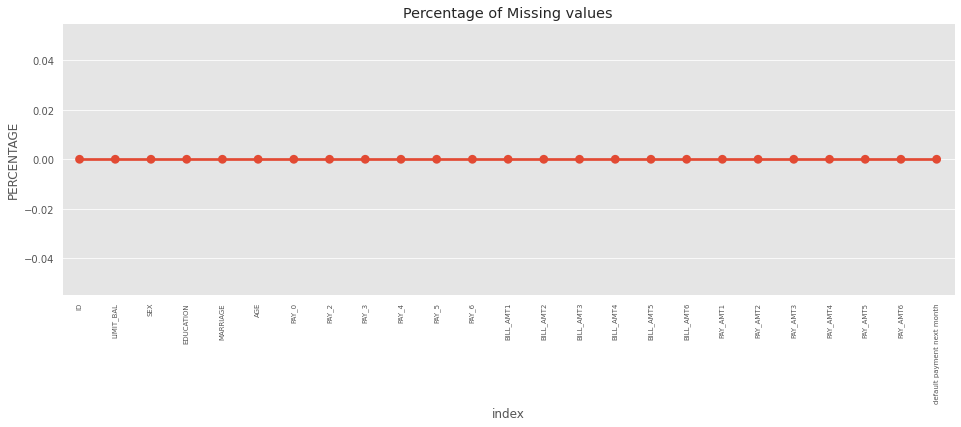

In [ ]:
# Calualating the Missing Values in the data frame
missing = pd.DataFrame((df_ccd.isnull().sum())*100/df_ccd.shape[0]).reset_index()  #defining a dataframe to store percent of missing values present in the dataset
plt.figure(figsize= (16,5)) #defiing the size of the figure
ax = sns.pointplot('index', 0, data = missing) #plotting a point plot 
plt.xticks(rotation =90, fontsize = 7) #rorating the ticks of x axis for better visibility of the feature name
plt.title("Percentage of Missing values") #title of the plot
plt.ylabel("PERCENTAGE") #y label of the plot
plt.show()


Found that there are no Null Values in the Data Frame 

#####**Duplicate Values**

In [ ]:
# Checking the duplicate values

duplicate_value = df_ccd.duplicated().sum()
print('Total number of duplicate values:', duplicate_value)

Total number of duplicate values: 0


In [ ]:
# Rename the columns
df_ccd.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'CC_UsageSept',
                   'PAY_2': 'CC_UsageAug',
                   'PAY_3': 'CC_UsageJul',
                   'PAY_4': 'CC_UsageJun',
                   'PAY_5': 'CC_UsageMay',
                   'PAY_6': 'CC_UsageApr',
                   'BILL_AMT1': 'invoice_sept',
                   'BILL_AMT2': 'invoice_aug',
                   'BILL_AMT3': 'invoice_jul',
                   'BILL_AMT4': 'invoice_jun',
                   'BILL_AMT5': 'invoice_may',
                   'BILL_AMT6': 'invoice_apr',
                   'PAY_AMT1': 'total_amount_sept',
                   'PAY_AMT2': 'total_amount_aug',
                   'PAY_AMT3': 'total_amount_jul',
                   'PAY_AMT4': 'total_amount_jun',
                   'PAY_AMT5': 'total_amount_may',
                   'PAY_AMT6': 'total_amount_apr',
                   'dpnm' : 'default_payment',
                   'default payment next month':'IsDefaulter'}, inplace=True)


#####**Datatype Conversion**

In [ ]:
# converting datatype of columns from int to object

df_ccd[['gender','education','marital_status','CC_UsageSept','CC_UsageAug','CC_UsageJul','CC_UsageJun','CC_UsageMay', 
        'CC_UsageApr']] = df_ccd[['gender','education','marital_status','CC_UsageSept','CC_UsageAug','CC_UsageJul','CC_UsageJun','CC_UsageMay',
        'CC_UsageApr']].apply(lambda x: x.astype('object'))

In [ ]:
df_ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 30000 non-null  int64 
 1   credit_limit       30000 non-null  int64 
 2   gender             30000 non-null  object
 3   education          30000 non-null  object
 4   marital_status     30000 non-null  object
 5   age                30000 non-null  int64 
 6   CC_UsageSept       30000 non-null  object
 7   CC_UsageAug        30000 non-null  object
 8   CC_UsageJul        30000 non-null  object
 9   CC_UsageJun        30000 non-null  object
 10  CC_UsageMay        30000 non-null  object
 11  CC_UsageApr        30000 non-null  object
 12  invoice_sept       30000 non-null  int64 
 13  invoice_aug        30000 non-null  int64 
 14  invoice_jul        30000 non-null  int64 
 15  invoice_jun        30000 non-null  int64 
 16  invoice_may        30000 non-null  int64

In [ ]:
# Setting the ID numbers as Index
df_ccd.set_index('ID', inplace = True)
df_ccd

,credit_limit,gender,education,marital_status,age,CC_UsageSept,CC_UsageAug,CC_UsageJul,CC_UsageJun,CC_UsageMay,CC_UsageApr,invoice_sept,invoice_aug,invoice_jul,invoice_jun,invoice_may,invoice_apr,total_amount_sept,total_amount_aug,total_amount_jul,total_amount_jun,total_amount_may,total_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
#checking of the renamed data  and changed datype data
df_ccd.head()

,credit_limit,gender,education,marital_status,age,CC_UsageSept,CC_UsageAug,CC_UsageJul,CC_UsageJun,CC_UsageMay,CC_UsageApr,invoice_sept,invoice_aug,invoice_jul,invoice_jun,invoice_may,invoice_apr,total_amount_sept,total_amount_aug,total_amount_jul,total_amount_jun,total_amount_may,total_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df_ccd.tail()

,credit_limit,gender,education,marital_status,age,CC_UsageSept,CC_UsageAug,CC_UsageJul,CC_UsageJun,CC_UsageMay,CC_UsageApr,invoice_sept,invoice_aug,invoice_jul,invoice_jun,invoice_may,invoice_apr,total_amount_sept,total_amount_aug,total_amount_jul,total_amount_jun,total_amount_may,total_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## **Handling Outliers**

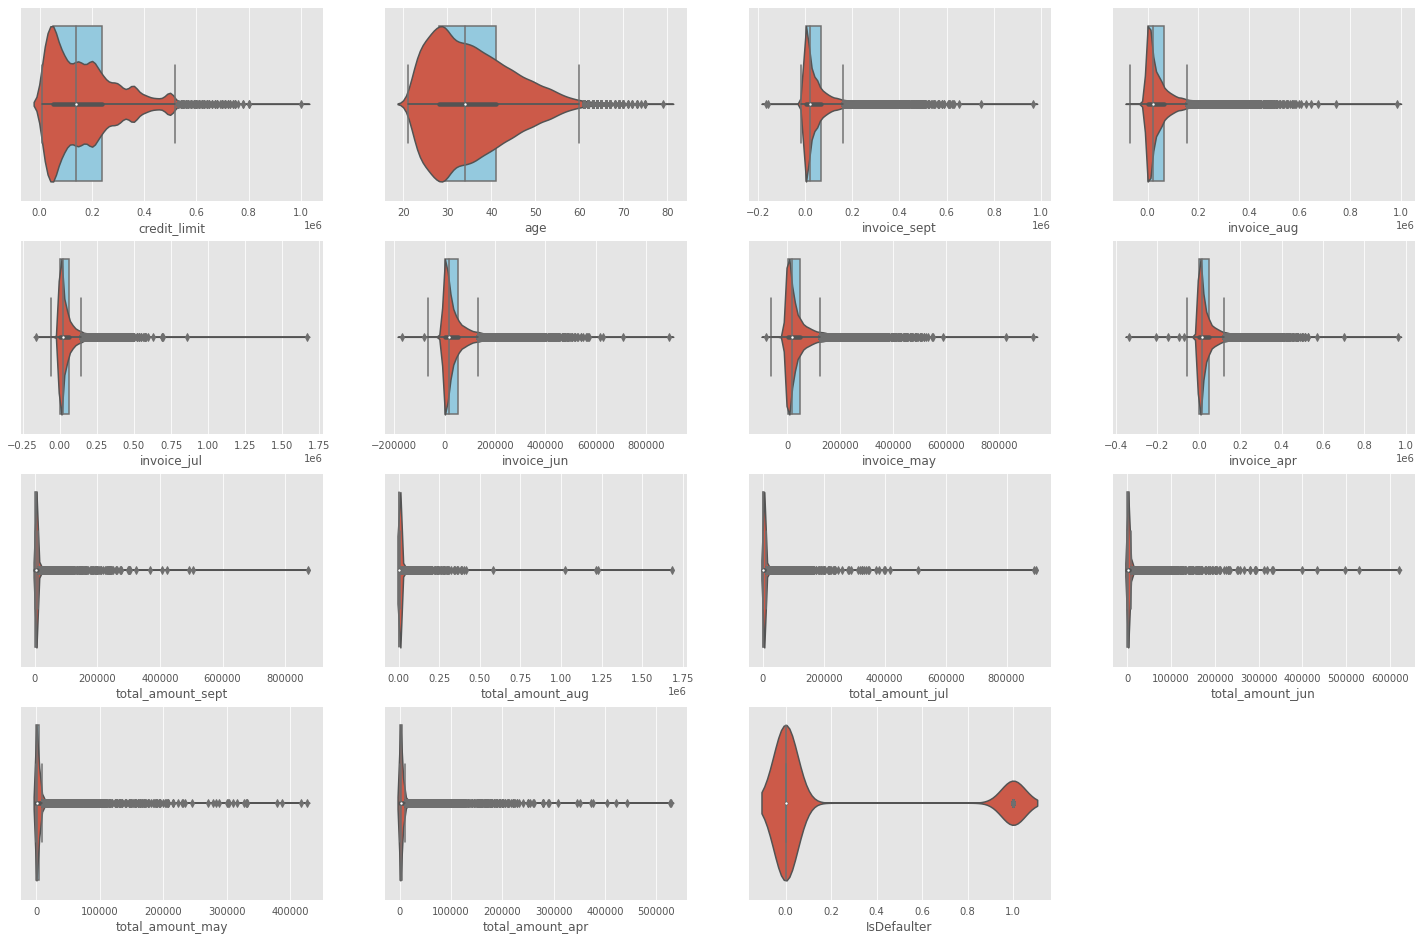

In [ ]:
# Checking the outliers in the given data sets

feat_num = df_ccd.select_dtypes(include =['int64', 'float64'])

plt.figure(figsize=(25,25))
n=1

for column in feat_num:
  plt.subplot(6,4,n)
  n = n+1
  sns.boxplot(df_ccd[column], color ='skyblue' )
  sns.violinplot(df_ccd[column])

Finally obtained many Outliers which need to be treated. In Order to get good Model


### **Treating Outlier**

For credit_limit Upper limit is 335000.0, and lower limit is -45000.0
For age Upper limit is 47.5, and lower limit is 21.5
For invoice_sept Upper limit is 98857.125, and lower limit is -28207.375
For invoice_aug Upper limit is 94517.0, and lower limit is -27526.0
For invoice_jul Upper limit is 88914.0, and lower limit is -26083.0
For invoice_jun Upper limit is 80595.625, and lower limit is -23762.875
For invoice_may Upper limit is 74404.25, and lower limit is -22450.75
For invoice_apr Upper limit is 73169.375, and lower limit is -22715.125
For total_amount_sept Upper limit is 7009.0, and lower limit is -1003.0
For total_amount_aug Upper limit is 7083.5, and lower limit is -1250.5
For total_amount_jul Upper limit is 6562.5, and lower limit is -1667.5
For total_amount_jun Upper limit is 5871.875, and lower limit is -1562.625
For total_amount_may Upper limit is 5921.0, and lower limit is -1637.0
For total_amount_apr Upper limit is 5941.125, and lower limit is -1823.375
For IsDefaulter Upp

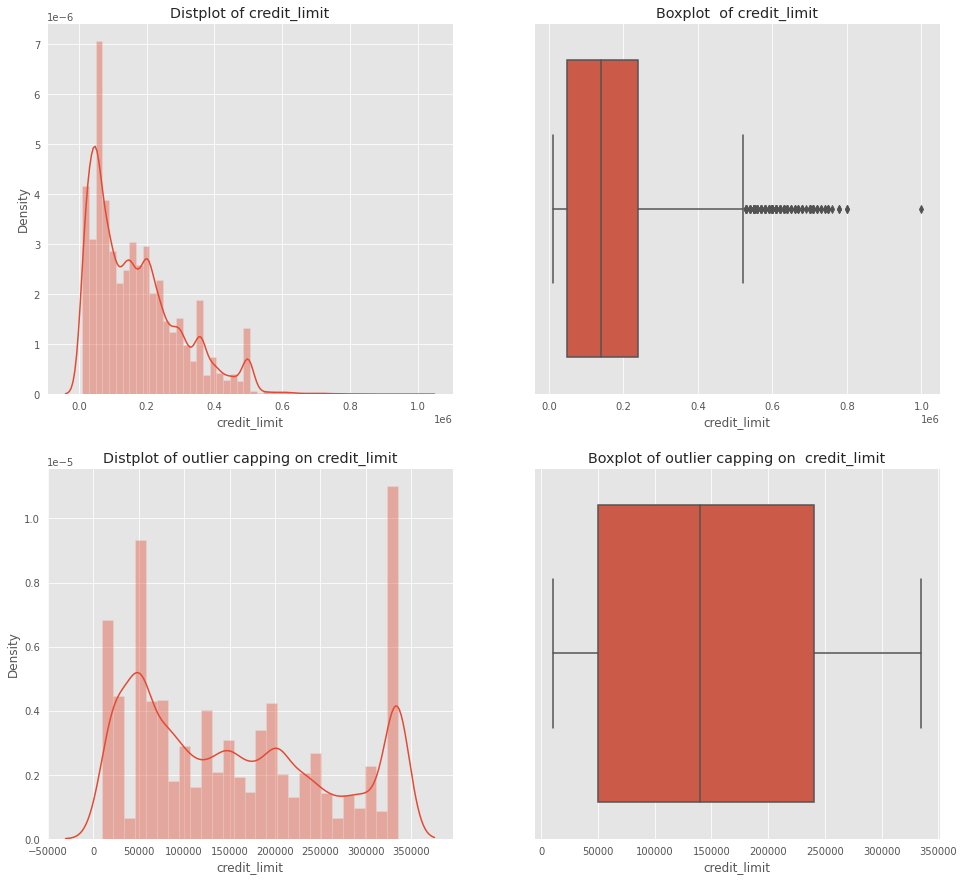

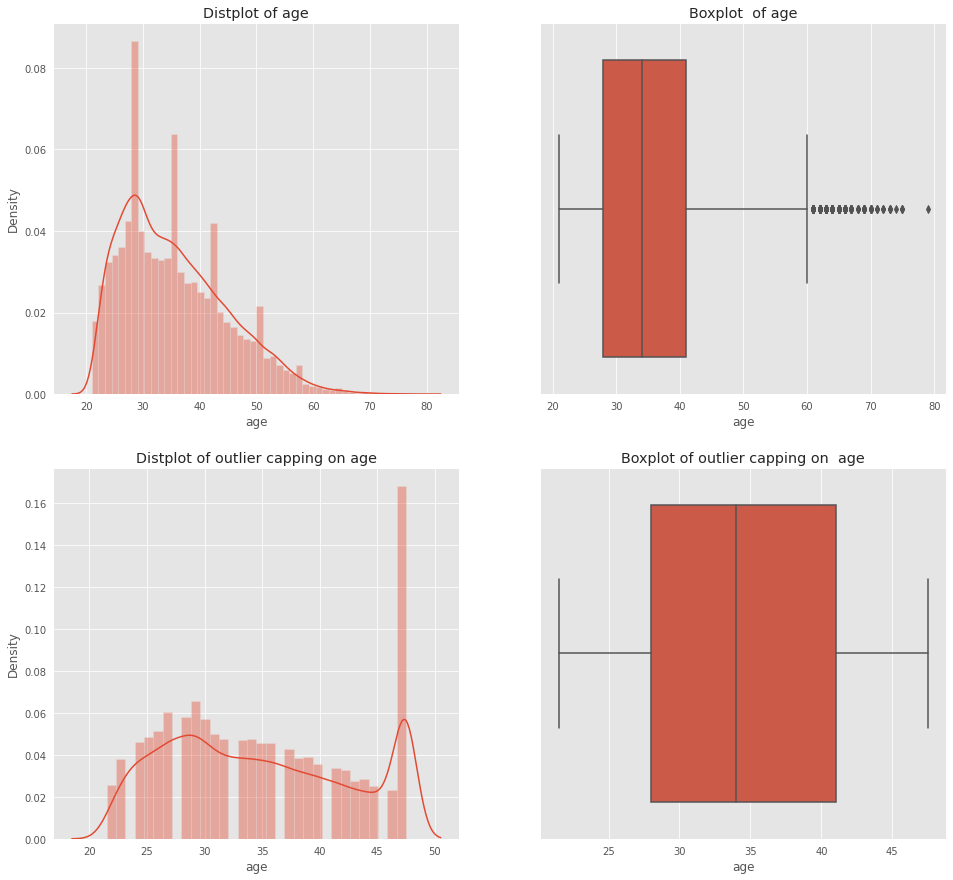

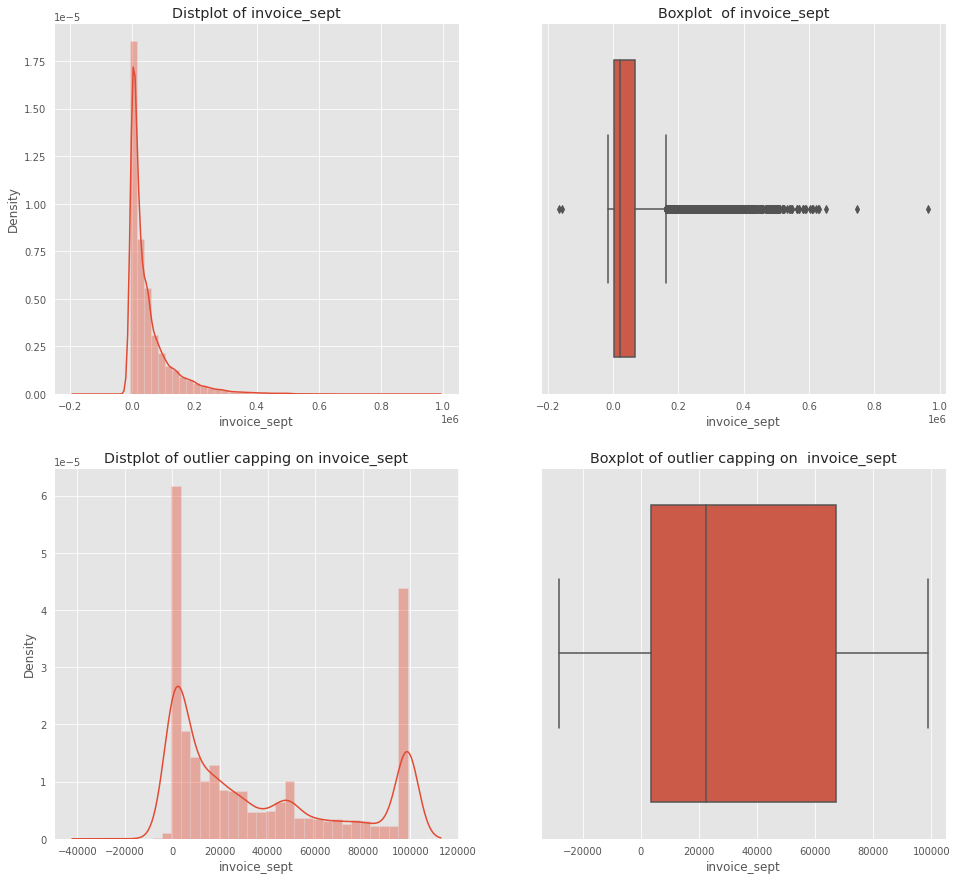

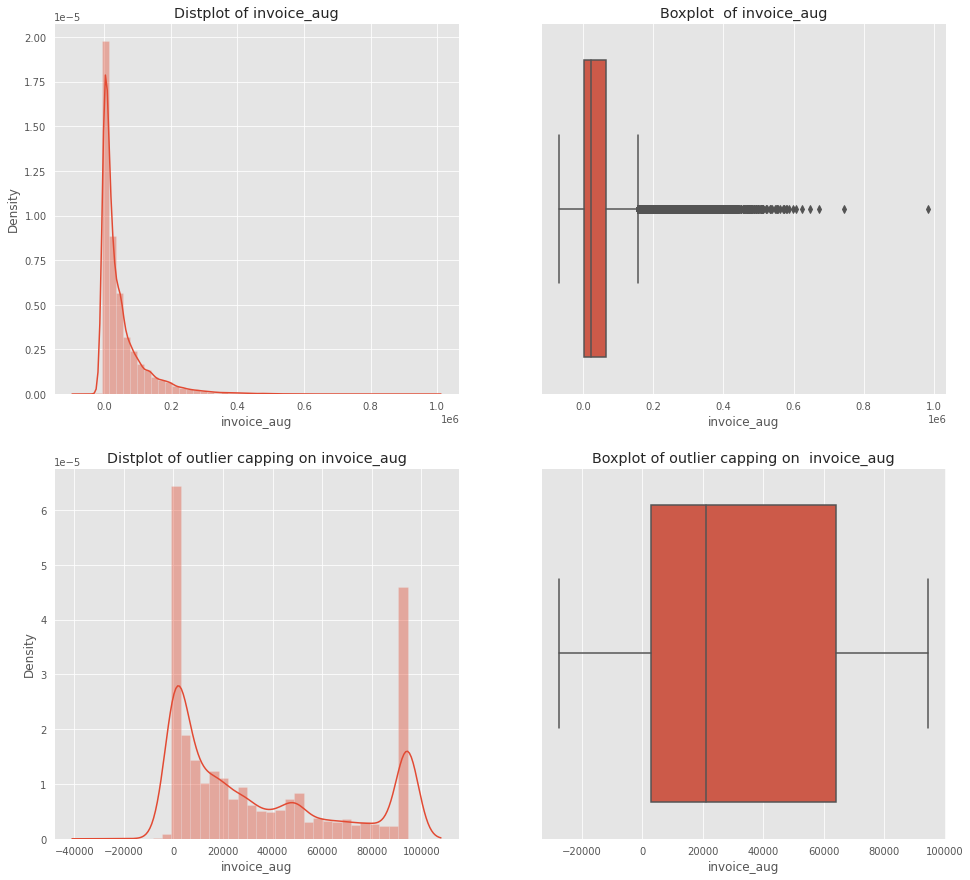

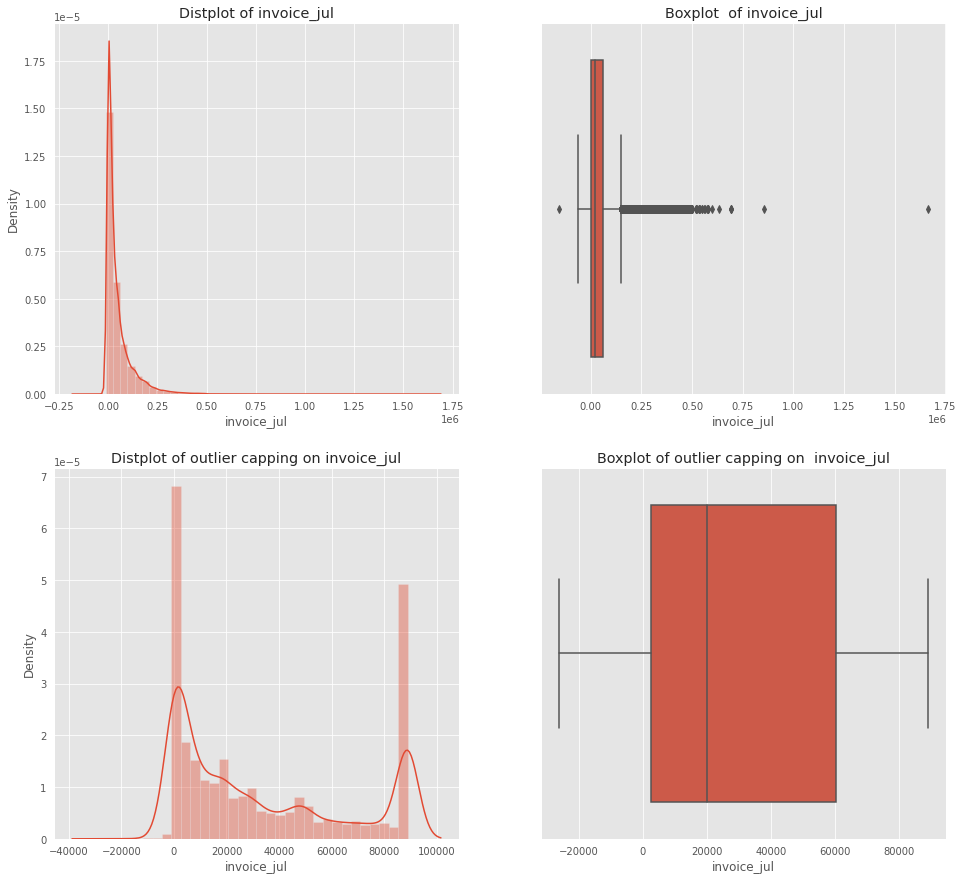

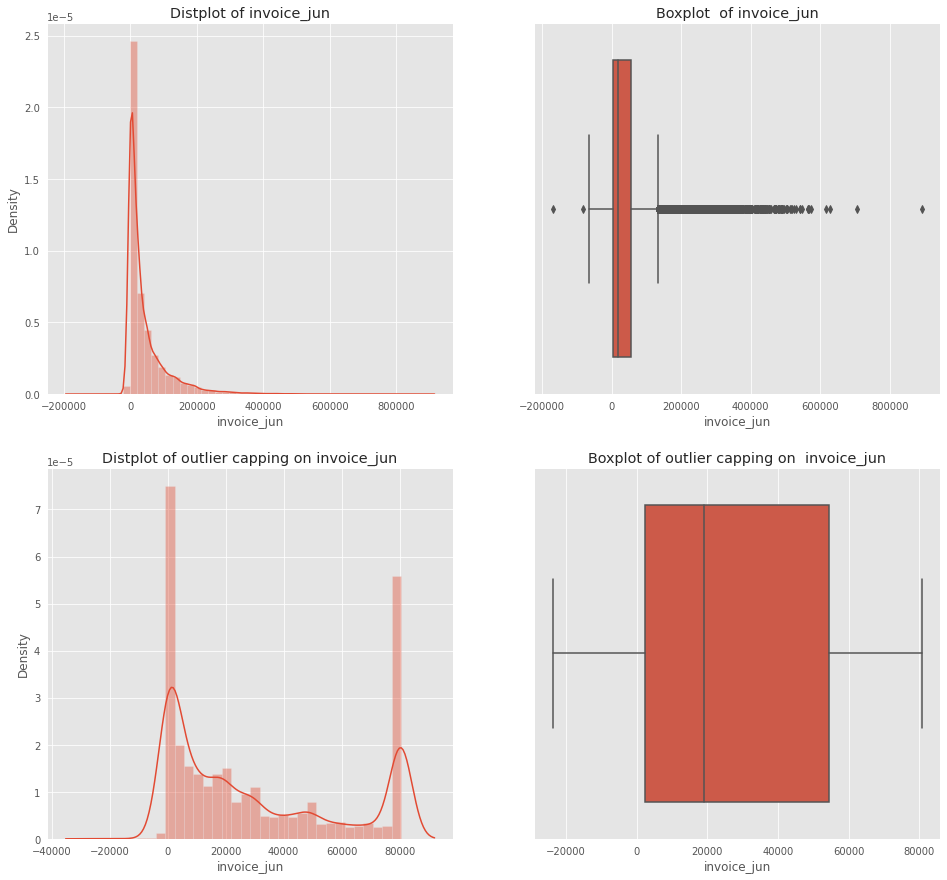

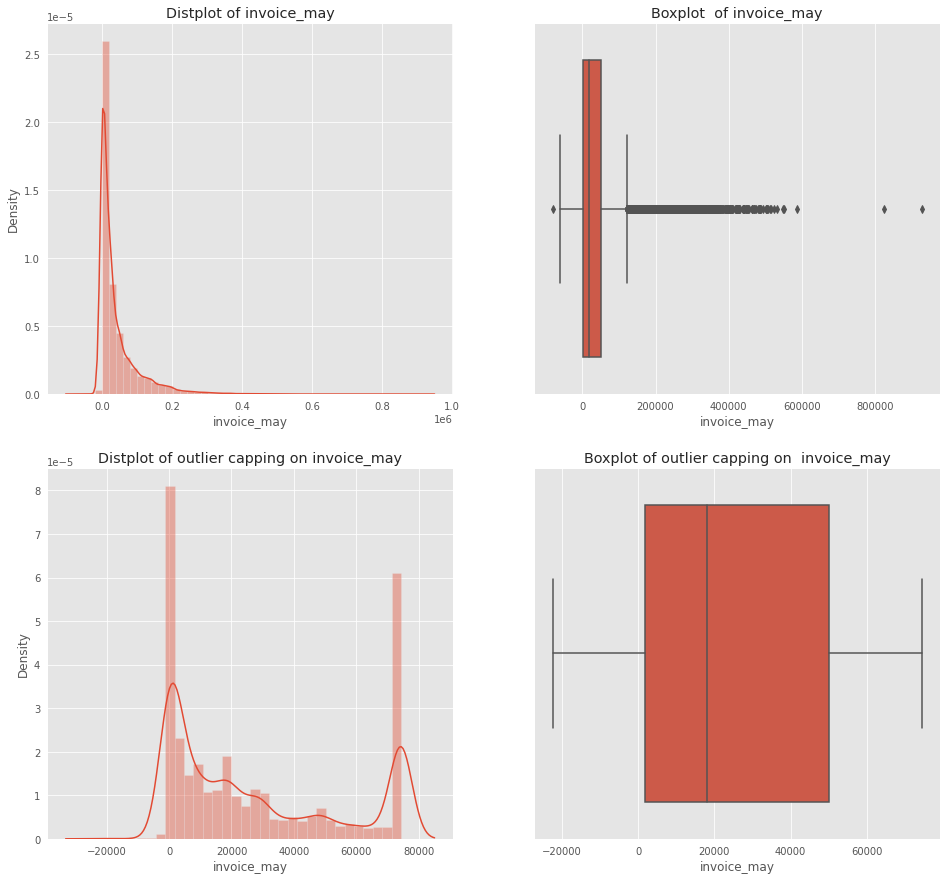

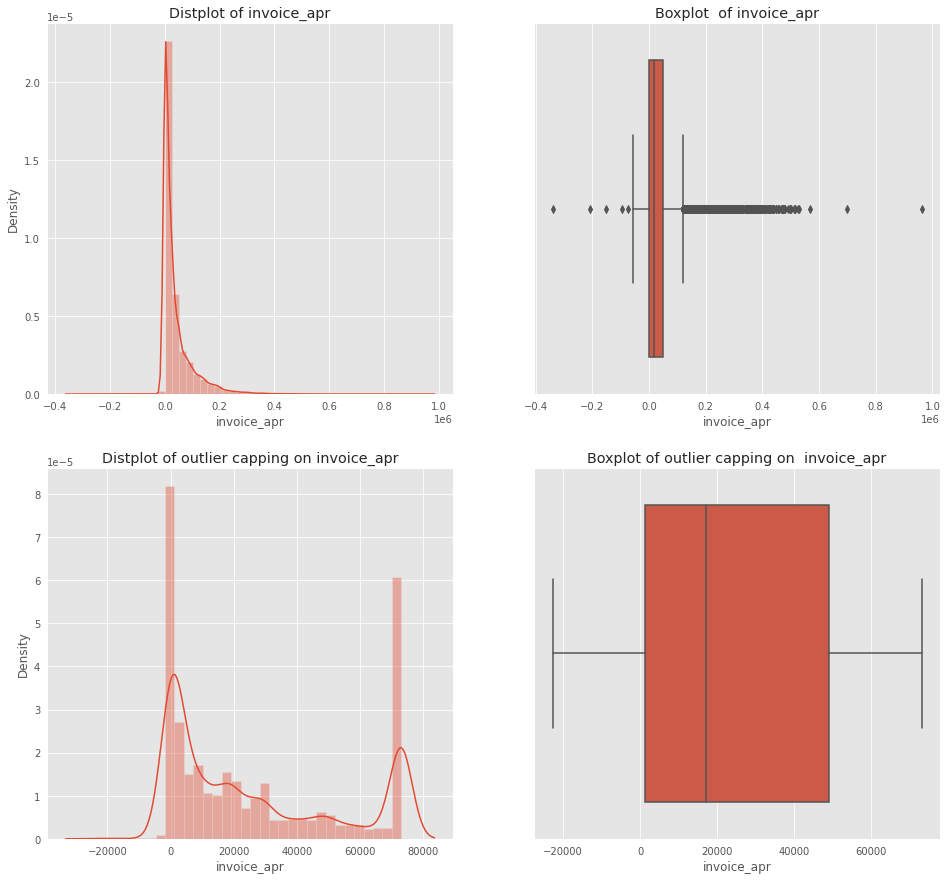

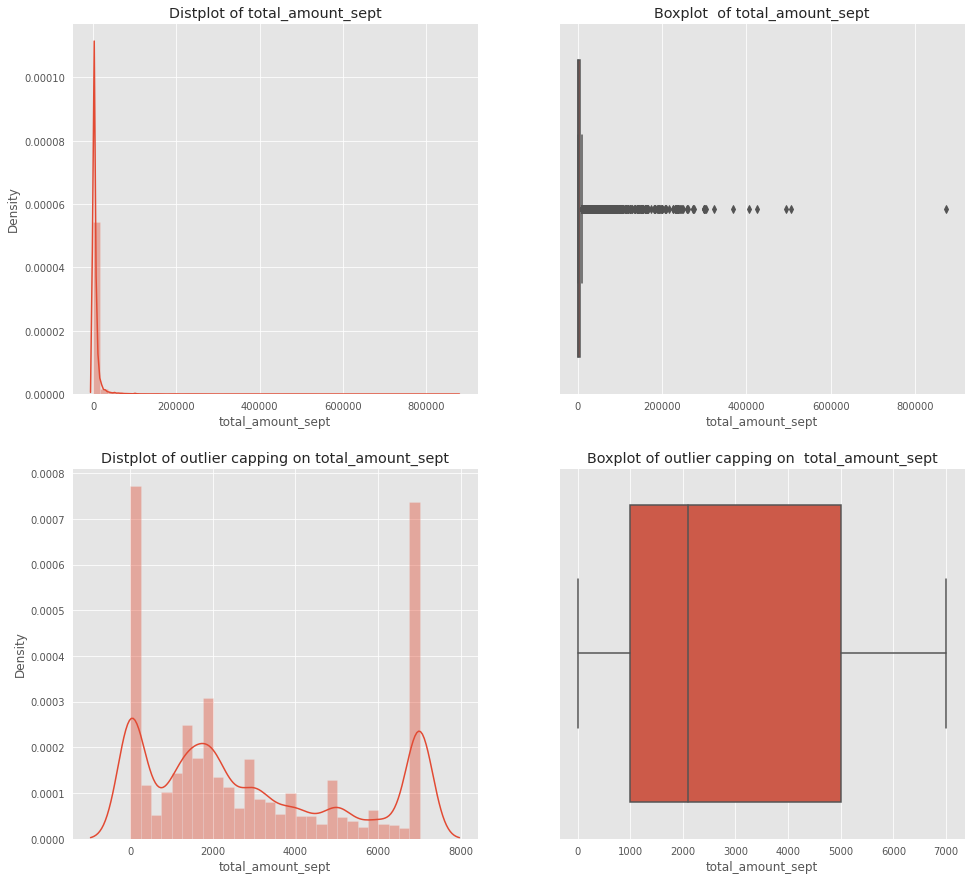

In [ ]:
# creating a for loop to iterate over  and capp all the outliers on entire numerical features
for i in feat_num:
  percentile_25 = feat_num[i].quantile(0.25) #creating a variable for 25th percentile
  percentile_75 = feat_num[i].quantile(0.75) #creating a variable for 75th percentile
  iqr = percentile_75 - percentile_25 #calculating the  interquartile range
  upper_limit = percentile_25 + 1.5 * iqr # caculating the upper bound limit, above which the data will be considered outlier
  lower_limit = percentile_75 - 1.5 * iqr # # caculating the lower bound limit, below  which the data will be considered outlier

  print(f'For {i} Upper limit is {upper_limit}, and lower limit is {lower_limit}') # printing the upper and lower limit of each feature

  feat_num[df_ccd[i] > upper_limit] #to check the outlier record
  feat_num[df_ccd[i] < lower_limit] #to check the outlier record
  new_df_capped = feat_num.copy() #definig new dataframe to store the oulier capped dataset
  new_df_capped[i] = np.where(new_df_capped[i] > upper_limit, upper_limit, 
    np.where(new_df_capped[i] < lower_limit, lower_limit,new_df_capped[i])) # replacing the outliers with the  specifed limits

#ploting a figure to compare the difference in distribution of data
  plt.figure(figsize = (16,15)) 
  plt.subplot(2,2,1)
  sns.distplot(df_ccd[i])
  plt.title(f'Distplot of {i}')
  plt.subplot(2,2,2)
  sns.boxplot(df_ccd[i])
  plt.title(f'Boxplot  of {i}')
  plt.subplot(2,2,3)
  sns.distplot(new_df_capped[i])
  plt.title(f'Distplot of outlier capping on {i}')
  plt.subplot(2,2,4)
  sns.boxplot(new_df_capped[i])
  plt.title(f'Boxplot of outlier capping on  {i}')

# **Exploratory Data Analysis**

### **Analysis of dependent Variable:**

In [ ]:
# plotting the count plot to vizualize the data distribution 
sns.color_palette("hls")
sns.set_style('whitegrid')

def_cnt = (df_ccd.IsDefaulter.value_counts(normalize=True)*100) #calculating percetnage of the datapoints. Normalize is used to divide the total into each of the category presernt in the dataset
def_cnt.plot.bar(figsize=(10,6), color = ['indianred','cadetblue']) #plotting a bar plot
plt.xticks(fontsize=12, rotation=0) #adjusting size and adding x ticks, rotation =0 means the x labels will be same
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15) # title of plot
for x,y in zip([0,1],def_cnt): # to annotate the values on top of the bars
    plt.text(x,y,y,fontsize=12)
plt.show()

By Capping Method we removed all the Outliers. The Plotted Graph Represents Outliers are removed 

In [ ]:
# checking the balance of the dependent variable by counting the values of each unique set.
df_ccd['IsDefaulter'].value_counts()

#**Independent Variables:**

*   ## Gender

In [ ]:
# Change gender code to 'F' and 'M' and use category as datatype to get better readability

df_ccd["gender"]=df_ccd["gender"].map({1:'M',2:'F'}).astype('category')
df_ccd["gender"].dtypes

In [ ]:
# understanding the distribution of male and female in the dataset
df_ccd['gender'].value_counts(normalize = True)

###Observation:
Most of the credit card users are female which counts to 60% of total data

*    ## Education

In [ ]:
#counting the fraction of educational diversity
df_ccd['education'].value_counts()

In [ ]:
adding_df = (df_ccd['education'] == 5) | (df_ccd['education'] == 6) | (df_ccd['education'] == 0)
df_ccd.loc[adding_df, 'education'] = 4
df_ccd['education'].value_counts(normalize = True)

###Observation:
Majority of the users are university students counting to around 47% of total counts.

*    ## Marital Status

In [ ]:
#checking marital status 
df_ccd['marital_status'].value_counts()

In [ ]:
adding_df2 = df_ccd['marital_status'] == 0
df_ccd.loc[adding_df2, 'marital_status'] = 3
df_ccd['marital_status'].value_counts(normalize = True)

### Observation:

Majorly, around 53% of credit card were owned by married customer.

## **CC_UsageSep**

-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above




In [ ]:
#checking previous month payment status
df_ccd['CC_UsageSept'].value_counts()

Since, there are 0,-2, 02 are also present, but as per our stated description, we know that -1 is paid on time. So, we will merge all these columns to -1.

In [ ]:
pay_comb  = (df_ccd['CC_UsageSept'] == 0) | (df_ccd['CC_UsageSept'] == -2) #getting the set of values containing -2,0 by creating condition
df_ccd.loc[pay_comb, 'CC_UsageSept'] = -1 #mapping the condition to replace those with -1
df_ccd['CC_UsageSept'].value_counts(normalize = True)*100 #checking  the percentage of data

### Observation:

around 77% customers paid the september bill on time.

### **CC_UsageAug**

In [ ]:
# checking previous month payment status
df_ccd['CC_UsageAug'].value_counts()

# Since, there are 0,-2, 02 are also present, but as per our stated description, 
# we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_aug  = (df_ccd['CC_UsageAug'] == 0) | (df_ccd['CC_UsageAug'] == -2) # getting the set of values containing -2,0 by creating condition
df_ccd.loc[pay_comb_aug, 'CC_UsageAug'] = -1                                 # mapping the condition to replace those with -1
df_ccd['CC_UsageAug'].value_counts(normalize = True)                         # checking the count of data

### Observation:

Around 85% customers has paid the bill of august on time.

## **CC_UsageJul**

In [ ]:
# checking previous month payment status
df_ccd['CC_UsageJul'].value_counts()

# Since, there are 0,-2, 02 are also present, but as per our stated description, 
# we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_jul  = (df_ccd['CC_UsageJul'] == 0) | (df_ccd['CC_UsageJul'] == -2)  # getting the set of values containing -2,0 by creating condition
df_ccd.loc[pay_comb_jul, 'CC_UsageJul'] = -1                                  # mapping the condition to replace those with -1
df_ccd['CC_UsageJul'].value_counts(normalize = True)                          # checking the count of data

### Observation:

Around 86% customers had paid july bill on time

## **CC_UsageJun**

In [ ]:
# checking previous month payment status
df_ccd['CC_UsageJun'].value_counts()

# Since, there are 0,-2, 02 are also present, but as per our stated description, 
# we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_jun  = (df_ccd['CC_UsageJun'] == 0) | (df_ccd['CC_UsageJun'] == -2)  # getting the set of values containing -2,0 by creating condition
df_ccd.loc[pay_comb_jun, 'CC_UsageJun'] = -1                                  # mapping the condition to replace those with -1
df_ccd['CC_UsageJun'].value_counts(normalize = True)                          # checking the count of data

### Observation:

Around 88% of customers had paid the june bill on time.

## **CC_UsageMay**

In [ ]:
# checking previous month payment status
df_ccd['CC_UsageMay'].value_counts()

# Since, there are 0,-2, 02 are also present, but as per our stated description, 
# we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_may  = (df_ccd['CC_UsageMay'] == 0) | (df_ccd['CC_UsageMay'] == -2)  # getting the set of values containing -2,0 by creating condition
df_ccd.loc[pay_comb_may, 'CC_UsageMay'] = -1                                  # mapping the condition to replace those with -1
df_ccd['CC_UsageMay'].value_counts(normalize = True)                          # checking the count of data

### Observation:

Aroung 90% of the uctomers has the paid the may bill on time.


## **CC_UsageApr**

In [ ]:
# checking previous month payment status
df_ccd['CC_UsageApr'].value_counts()

# Since, there are 0,-2, 02 are also present, but as per our stated description, 
# we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_apr  = (df_ccd['CC_UsageApr'] == 0) | (df_ccd['CC_UsageApr'] == -2)  # getting the set of values containing -2,0 by creating condition
df_ccd.loc[pay_comb_apr, 'CC_UsageApr'] = -1                                  # mapping the condition to replace those with -1
df_ccd['CC_UsageApr'].value_counts(normalize = True)                          # checking the count of data

### Observation:

Around 89% of the customers paid duly the april bill.

Overall, around 80% of the customers had paid the previous month bill on time. The defaulter rate was very very less.

### **Plotting the categorical features**

In [ ]:
# creating a dataframe to store the categorical features

categorical_features = ['gender', 'education', 'marital_status','CC_UsageSept','CC_UsageAug','CC_UsageJul','CC_UsageJun','CC_UsageMay','CC_UsageApr','age']

In [ ]:
cat_df = df_ccd[categorical_features]         # creating a new dataframe of categorical variables

cat_df['Defaulter'] = df_ccd['IsDefaulter']   # saving required feature in a new dataframe to ease the analysis

In [ ]:
#since, the values were label encoded. We are decoding the labels for clearer visualization

cat_df.replace({'gender': {1 : 'MALE', 2 : 'FEMALE'}, 'education' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'marital_status' :  {1 : 'Married', 2 : 'Single', 3 : 'Others'}},inplace=True)

In [ ]:
# plotting pie chart and bar graph to visulise the counts of defaulters and non-defaulters under each sub category

for col in categorical_features:

  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df_ccd[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  
  sns.countplot(x = col, hue = 'Defaulter', data = cat_df)

In [ ]:
# Create a new column "has_def" to indicate customers who have at least 1 deafult payment from April to September
# 0 : no default ; 1: has default

def_condition = (df_ccd.CC_UsageSept>1) | (df_ccd.CC_UsageAug>1) | (df_ccd.CC_UsageJul>1) | (df_ccd.CC_UsageJun>1) | (df_ccd.CC_UsageMay>1) | (df_ccd.CC_UsageApr>1)
df_ccd.loc[def_condition, "has_def"] = 1                                    # creating "has_def" column to indicate all the rows by 1 where the def_condition is true in cred_df
df_ccd.loc[df_ccd.has_def.isna(), "has_def"] = 0  

In [ ]:
# Function to plot stacked bar charts for categorical variables 

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    defaultGroupBy = pd.crosstab(index=df_ccd['has_def'], columns = cat_df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    defaultGroupBy = defaultGroupBy.apply(lambda x: round(x,2))
    
    labels = defaultGroupBy.columns #creating label for the plot
    list1 = defaultGroupBy.iloc[0].to_list()
    list2 = defaultGroupBy.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    #plotting the bar chart
    sns.color_palette("pastel")
    sns.set_style('whitegrid')
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name, color = 'indianred')
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name, color = 'cadetblue')

#formatting the plot
    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

 #adding x and y ticks   
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

#to annotate the plot
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=11)
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="k", fontsize=11)

    plt.show()

In [ ]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('gender')

### Observation:

Since we were not able to comment on female defaulter being at majority by the previous data . Now, it is clear although there were more female defaulter but the rate of being defaulter is comparitevely higher in males with 30% of total defaulters comapared to 26% of female defaulter respectively.

In [ ]:
# Plot a stacked bar chart to show default as per marital status

create_stacked_bar('marital_status')

### Observation:

As we can see in chart, we can infer that there is quite similar distribution of defaulters in each category indicating marital status does not influence the defaulter customers. However, dominant category for defaulter is others.

In [ ]:
# Plot a stacked bar chart to show default by education level

create_stacked_bar('education')

### Observation:

The data indicates customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education.

In [ ]:
# Use boxplot to visualize credit limit grouped by education level

ccdlist = []
for i in [1,2,3,4]:
    temp = df_ccd.loc[df_ccd.education == i,"credit_limit"]
    ccdlist.append(temp)        # created a list which stored the data that satisfies the above given condition.s

fig, ax = plt.subplots()
ax.boxplot(ccdlist)             # plotting a box plot
ax.set_xticklabels(["grad school", "university", "high school","others"]) # setting the tick labels

plt.show()

### Observation:

From the boxplot, it is clear that customers with grad school education have the highest median and highest maximum number, so we can say that people with higher education levels did get higher credit limits.

In [ ]:
# Checking the descriptive statistics of Limit Balance feature in the dataset
df_ccd['credit_limit'].describe()

# Plotting the distribution of Limit Balance feature
plt.figure(figsize = (10,5))
sns.distplot(df_ccd['credit_limit'], kde = True)
plt.show()


### Observation:


Maximum amount of given credit is 50000 NT dollars followed by 30000 and 20000.

In [ ]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]      # creating bins 

labels = ['20-30','30-40','40-50','50-60','60-70','70-80'] # labelling the age interval
cat_df['age'] = pd.cut(cat_df['age'], bins=bins, labels=labels, right=False)

create_stacked_bar('age') # plotting stacked bar of defaulters as per the age

### Observation:

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

In [ ]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = df_ccd.loc[df_ccd['IsDefaulter'] == 0,'credit_limit']
def1 = df_ccd.loc[df_ccd['IsDefaulter'] == 1,'credit_limit']

#plotting the figure
fig, ax = plt.subplots() 
ax.boxplot([def0, def1],  showfliers=False)

#formattting the plot
ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')


plt.show()

### Observation:

Customers with high credit limits tend to pay the pay on time and hence are not defaulters.

In [ ]:
df_ccd.columns

In [ ]:
df_ccd.head()

In [ ]:
df_ccd.describe()

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df_ccd.CC_UsageSept, y=df_ccd.invoice_sept, c='violet', s=1)

plt.subplot(232)
plt.scatter(x=df_ccd.CC_UsageAug, y=df_ccd.invoice_aug, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df_ccd.CC_UsageJul, y=df_ccd.invoice_jul, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df_ccd.CC_UsageJun, y=df_ccd.invoice_jun, c='y', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df_ccd.CC_UsageMay, y=df_ccd.invoice_may, c='orange', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df_ccd.CC_UsageApr, y=df_ccd.invoice_apr, c='r', s=1)

plt.suptitle('relation between bill amount and payment done in 6 months.')
plt.show()

Observation:
Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

This we can infer since maximum of data points are closely packed along the Y-axis near to 0 on X-axis.

In [ ]:
# assign the bill amount variable to a single variable
total_bill_amt_df = df_ccd[['invoice_sept',	'invoice_aug',	'invoice_jul',	'invoice_jun',	'invoice_may',	'invoice_apr', 'IsDefaulter']]

# plotting pair plot for bill amount for better visualization
sns.pairplot(data = total_bill_amt_df, hue = 'IsDefaulter', palette = 'hls')

In [ ]:
#plotting a heat map to understand correlation between features
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_ccd.corr(),annot=True,cmap="YlGnBu" , ax=ax);

In [ ]:
#plotting the feature importance as per peaarson correlation
X = df_ccd.drop(['IsDefaulter','has_def'],axis=1) #dropping column which are not required at present
X.corrwith(df_ccd['IsDefaulter']).plot.bar(figsize = (15, 5), title = "Correlation with Default",  #creating a bar plot of corrlation of features.
                                        fontsize = 10,rot = 90, grid = True)

### Observation:

It seems from the above graph is that most negatively correlated feature is credit_limit, but we cannot blindly remove this feature because it is a very important feature for prediction. ID is not important and it has no role in prediction so we have removed it converted it column to index.

## **Statistical Analysis for Correlation**


1. Correlation between credit limit and bill amount: Pearson R
2. Correlation between credit limit and payment default: t-test
3. Correlation between education and payment default: chi-squared test
4. Correlation between age and payment default: chi-squared test
5. Correlation between sex and payment default: permutation test
6. Correlation between sex and credit limit: t-test

**Correlation between credit limit and bill amount.**

 We assume customers who have a high credit limit will have a higher bill amount.



In [ ]:
#finding  whether the customer with high credit limit has high bill amount as well
df_ccd['bill_sum'] = df_ccd[['invoice_sept',	'invoice_aug',	'invoice_jul',	'invoice_jun',	'invoice_may',	'invoice_apr']].sum(axis=1)
credit_bill = df_ccd[['credit_limit','bill_sum']]       
credit_bill.corr() #finding correlation

In [ ]:
#calculating person correlation between the credit limit and bill amount
credit_limit = df_ccd['credit_limit']
bill_amount = df_ccd[['invoice_sept',	'invoice_aug',	'invoice_jul',	'invoice_jun',	'invoice_may',	'invoice_apr']].sum(axis=1)
stats.pearsonr(credit_limit, bill_amount)

**Correlation between credit limit and payment default**.



Ideally, we should have customers' income data, but since this data is not available, we can assume higher income customers have higher credit limits. Therefore, we will verify if there is a correlation between credit limit and default payment using t-test.


1.   Null hypothesis: credit limit does not affect default likelihood.
2.   Alternative hypothesis: credit limit impact default likelihood.
3.   Set significance level  to 0.05



In [ ]:
#storing the required variables
no_def_limit = df_ccd.loc[df_ccd['has_def']==0,'credit_limit']
def_limit = df_ccd.loc[df_ccd['has_def']==1,'credit_limit']

In [ ]:
#performing t test to find the correlation by importing ttest 
ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))


> Indented block



In [ ]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df_ccd['has_def'], df_ccd['education'], margins=False)

In [ ]:
# Use Chi-squared test to test if education affects default likelihood.

stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

In [ ]:
# Get the contigence table of age and default data

age_def_contigence = pd.crosstab(df_ccd['has_def'], df_ccd['age'], margins=False)

In [ ]:
# Use chi-squared test to test if age affects default likelihood.


stat, p, dof, expected = chi2_contingency(age_def_contigence)

p

In [ ]:
# Get the true difference of 'HAS_DEF' proportions of two sex groups

male = df_ccd.loc[df_ccd['gender']=='M','has_def']
female = df_ccd.loc[df_ccd['gender']=='F','has_def']
true_diff_prop = male.sum()/len(male) - female.sum()/len(female) #calculating proportion
true_diff_prop

In [ ]:
# Define functions to do permutation test

def permutation_sample(data1, data2): #creating the permutation sample
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def diff_of_prop(data1,data2): #calculating the proportion
    diff = data1.sum()/len(data1) - data2.sum()/len(data2)

    return diff

def draw_perm_reps(data1, data2, func, size=1): # create permutation samples
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [ ]:
# Draw 10000 permutation tests

perm_replicates = draw_perm_reps(male,female,diff_of_prop,size=10000)

In [ ]:
# Calculate p value - the probability of getting a mean difference equal or greater than the observed mean difference

p = np.sum(perm_replicates >= true_diff_prop) / len(perm_replicates)
p

###Test conclusion: 

since the p value is 0, we should reject the null hypothsis and accept the alternative hypothsis, which is sex has impact on default likelihood. To be more concrete in this case, male customers tend to default more.

**Correlation between credit limit and sex.**



Since we know the credit limit is strongly correlated with default probability. Let's see if sex plays any role in credit limit and default likelihood.


1.   Null hypothesis: sex has no impact on credit limit.
2.   Alternative hypothesis: sex has impact on credit limit.
3.   Set significance level  to 0.05




In [ ]:
# Calculate the true mean difference of credit limit

male_limit= df_ccd.loc[df_ccd['gender']=='M','credit_limit']
female_limit = df_ccd.loc[df_ccd['gender']=='F','credit_limit']
print(np.mean(male_limit),np.mean(female_limit))

In [ ]:
# Use t-test to verify if different sex groups have the same mean of credit limit.

ttest_ind_from_stats(mean1=np.mean(male_limit),std1=np.std(male_limit),nobs1=len(male_limit),
                     mean2=np.mean(female_limit),std2=np.std(female_limit),nobs2=len(female_limit))

The p value is much higher than 𝛼 , so we will accept null hypothesis and accept alternative hypothesis. We have verified that sex plays a role in credit limit and it is not due to chance.

## **Feature Engineering**

Lets a take a look at all columns corresponding to customers whose bill amount was 0 in last 6 months

# Customers with no consumption for the past 6 months

In [ ]:
fil = ((df_ccd.invoice_apr == 0) & (df_ccd.invoice_may == 0) & (df_ccd.invoice_jun == 0) & (df_ccd.invoice_jul == 0) & (df_ccd.invoice_aug == 0) & (df_ccd.invoice_sept == 0) )
#fil = ((df.payment_status_aug == 2) & (df.bill_aug > 0) & (df.payment_amount_sept > 0))
df_ccd[fil][['CC_UsageSept', 'CC_UsageAug', 'CC_UsageJul', 'CC_UsageJun',
       'CC_UsageMay', 'CC_UsageApr', 'invoice_sept', 'invoice_aug',
       'invoice_jul', 'invoice_jun', 'invoice_may', 'invoice_apr','CC_UsageSept', 'CC_UsageAug', 'CC_UsageJul', 'CC_UsageJun',
       'CC_UsageMay', 'CC_UsageApr']].head(10)

I was just confirming whether any payment status given as wrong for this 316 people.Thankfully the dataset seems correct.

## **One Hot encoding**

Lets create a copy of our dataset for further processing

In [ ]:

df_ccd.columns

In [ ]:
df_ccd_encoded = df_ccd[['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'CC_UsageSept', 'CC_UsageAug', 'CC_UsageJul', 'CC_UsageJun',
       'CC_UsageMay', 'CC_UsageApr', 'invoice_sept', 'invoice_aug',
       'invoice_jul', 'invoice_jun', 'invoice_may', 'invoice_apr',
       'total_amount_sept', 'total_amount_aug', 'total_amount_jul',
       'total_amount_jun', 'total_amount_may', 'total_amount_apr',
       'IsDefaulter', 'bill_sum']]

In [ ]:
# one hot encode all the categorical features
#Lets convert categorical fearures into object dtype first
df_ccd_encoded[['gender','marital_status','education','CC_UsageSept', 'CC_UsageAug', 'CC_UsageJul', 'CC_UsageJun',
       'CC_UsageMay', 'CC_UsageApr']] = df_ccd_encoded[['gender','marital_status','education','CC_UsageSept', 'CC_UsageAug', 'CC_UsageJul', 'CC_UsageJun',
       'CC_UsageMay', 'CC_UsageApr']].astype('object')

In [ ]:
#One Hot encoding
df_ccd_encoded = pd.get_dummies(df_ccd_encoded)
df_ccd_encoded.head()

## **Feature Selection**

Three benefits of performing feature selection before modeling your data are:

1. Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
2. Improves Accuracy: Less misleading data means modeling accuracy improves.
3. Reduces Training Time: Less data means that algorithms train faster

**Feature importance**

Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 20 features for our dataset.

In [ ]:
# Split the df_ccd_encoded into train and test sets

X_d = df_ccd_encoded.drop(['IsDefaulter'], axis=1)  
y_d = df_ccd_encoded['IsDefaulter']


In [ ]:
model = ExtraTreesClassifier()
model.fit(X_d,y_d)
plt.figure(figsize=(13,9))

print('feature_importances of tree based classifiers:\n',model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_d.columns)
feat_importances.nlargest(23).plot(kind='barh',color='green')
plt.show()

**Feature Selection using ANOVA F-test**

In [ ]:
num_feats  = 23
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_d, y_d)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_d.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
print('selected features: \n',embeded_rf_feature)

In [ ]:
#selected_features in new dataframe
df_final = df_ccd_encoded[['IsDefaulter','credit_limit', 'age', 'invoice_sept', 'invoice_aug', 'invoice_jul', 'invoice_jun', 'invoice_may', 'invoice_apr', 'total_amount_sept', 'total_amount_aug', 'total_amount_jul', 'total_amount_jun', 'total_amount_may', 'total_amount_apr', 'bill_sum', 'CC_UsageSept_-1', 'CC_UsageSept_2', 'CC_UsageAug_-1', 'CC_UsageAug_2']]

## **Train-Test Split & Sampling**

We have already seen in EDA that there is a class imbalance for our target variable,we can apply some methos to deal with it.
3 ways for doing imbalanced classification problems:

1.  Random Oversampling: Randomly duplicate examples in the minority class, which has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event.

2.   Random Undersampling: Randomly delete examples in the majority class, which discard potentially useful information and the sample can be biased.

3.   SMOTE: Synthetic Minority Oversampling Technique

We will be using SMOTE for class balancing.

In [ ]:
# Split the df_new into train and test sets

X = df_final.drop(['IsDefaulter'], axis=1)  
y = df_final['IsDefaulter']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# Create the training df by remerging X_train and y_train

df_train = X_train.join(y_train)

In [ ]:
# Check the distribution of the samples in the train dataset

# Separate majority and minority classes
df_majority = df_train[df_train.IsDefaulter == 0]
df_minority = df_train[df_train.IsDefaulter == 1]

major_percent = df_majority.IsDefaulter.count()/ df_train.shape[0]*100
minor_percent = df_minority.IsDefaulter.count()/ df_train.shape[0]*100

print('Customers with No Default Payment Next Month :')
print(f'{df_majority.IsDefaulter.count()}({round(major_percent,2)}%)')
print("-----------")
print('Customers with Default Payment Next Month :')
print(f'{df_minority.IsDefaulter.count()}({round(minor_percent,2)}%)')
print("-----------")
# print(df_train.IsDefaulter.value_counts())
# the imbalanced train dataset

In [ ]:
# SMOTE: Synthetic Minority Oversampling Technique

sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

So we have 1 sets of training data: Train data with SMOTE algorithm




In [ ]:
## Original Dataset


xtrain_data = [X_SMOTE]
ytrain_data = [y_SMOTE]
name = ['SMOTE']

## **Predictive Models**

### **Metric**
For evaluation, we choose recall as the metric as we would like to predict which customers are likely to have default payment next month based on prudence -- we rather overestimate the potential loss/short of income flow than underestimate it in the perspective of cash flow control and risk management. We want to identify as many default customers as possible even though some of them are not actually defaulted. Recall is the ratio of True Positive over the sum of True Positive and False Negative which is the probability that we predict correctly.

In [ ]:
# Define a function which evaluates the model with train and test score 
# and also performs a K-fold cross validation on the train dataset

def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))
    print('Overall Train recall',recall_score(ytrain,y_pred))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]

    print('Overall Test Accuracy\n',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score\n',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
  
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()

  ## **1). Logistic Regression**

In [ ]:
# Find out the best parameters for all the datasets

for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
  
    global best_log
    print('Data is ',sampleName)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, num = 15)}
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'recall', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(standardized_Xtrain_df,ytrain)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

In [ ]:
# Best Parameter of each Sampling Method

param_log =[{'C': 0.0007196856730011522}]

In [ ]:
# Result of each Sampling Method

index = [0]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
  
    print('Data is ',sampleName ,' And with hyper parameter ', param_log[index])
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    standardized_Xtest = ss.transform(X_test)
    model_eval(LogisticRegression(**param_log[index],random_state= 42), standardized_Xtrain_df ,ytrain ,standardized_Xtest,y_test)
    print("_" * 60)

##  **2.) Decision Tree**

In [ ]:
## Original Dataset

# Find out the best parameters for all the datasets

for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    print('Data is ',sampleName)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'recall',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(Xtrain, ytrain)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",sampleName)
    print("_" * 100) 

In [ ]:
# Best Parameter of each Sampling Method


param_dt = [{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 8}]


In [ ]:
# Result of each Sampling Method

index = [0]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
  
    print('Data is ',sampleName ,' And with hyper parameter ',param_dt[index])
    model_eval(DecisionTreeClassifier(**param_dt[index],random_state= 42), Xtrain,ytrain,X_test,y_test)
    print("_" * 60)
    

In [ ]:
# Plotting feature importance based on Decision Trees:

features = X_train.columns
importances = rsearch_dt.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Decision trees')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **3.) RandomForest**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting**

In [ ]:
## Original Dataset

# Find out the best parameters for all the datasets

for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',sampleName)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 3, scoring = 'recall',n_iter = 50,random_state = 42,n_jobs = -1,return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(Xtrain, ytrain)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",sampleName)
    print("_" * 100)



In [ ]:
# Best Parameter of each Sampling Method

param_rf = [{'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 90}]

In [ ]:
# Result of each Sampling Method


index = [0]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ',param_rf[index])
    model_eval(RandomForestClassifier(**param_rf[index],random_state= 42), Xtrain, ytrain,X_test,y_test)
    print("_" * 60)

    

In [ ]:
# Plotting feature importance based on Random Forest:

features = X_train.columns
importances = rsearch_rfc.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance based on Random Forest')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **4.) K Nearest Neigbour Classifier**

In [ ]:
# Find out the best parameters for all the datasets

for Xtrain,ytrain in zip(xtrain_data,ytrain_data):
    global best_knn
    best_knn = []
    print('Data is ',sampleName)
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {
        "n_neighbors":[500, 800,1000, 1500, 2000],
        'leaf_size': [5,10,20,30,50],
        
    }
   
    
    # Instantiate a support vector classifier
    knn_clf  = KNeighborsClassifier()
    # Instantiate the RandomizedSearchCV object
    randomknn_clf = RandomizedSearchCV(knn_clf, param_grid ,refit = True, verbose =3, scoring = 'recall', cv=3, random_state=0)
    
    # Fit it to the data
    randomknn_clf.fit(Xtrain, ytrain)
    best_knn.append(randomknn_clf.best_params_)
    # Print the tuned parameters and score
    print("Tuned KNN Parameters: {}".format(randomknn_clf.best_params_))
    print("_" * 100)

In [ ]:
# Best Parameter of each Sampling Method

param_knn = [randomknn_clf.best_params_]

In [ ]:
# Result of each Sampling Method


index = [0]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):

    print('Data is ',sampleName ,' And with hyper parameter ',param_knn[index])        # printing classification report, confusion matrix and roc curve
    model_eval(KNeighborsClassifier(**param_knn[index]), Xtrain, ytrain,X_test,y_test)
    print("_" * 60)


## **Summary**

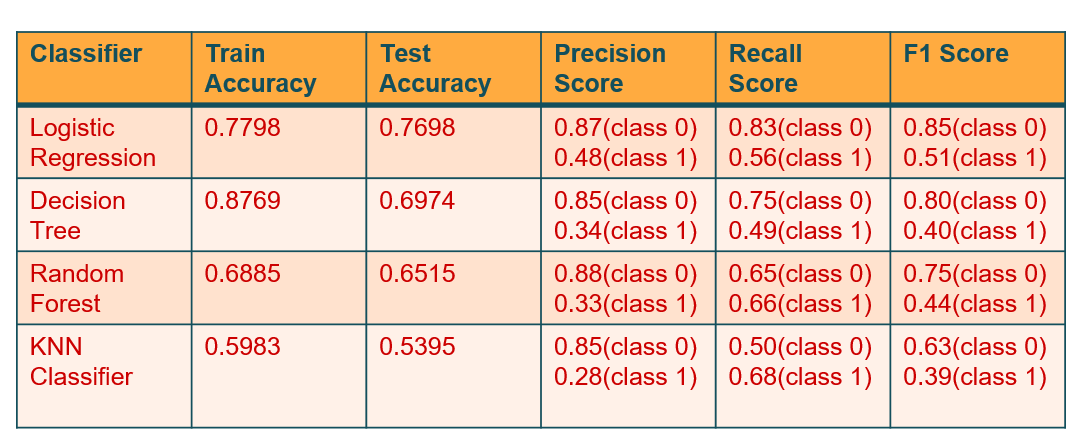

## **Conclusion**

1. **There was an imbalance in the target variable which was balanced using SMOTE(Synthetic Minority Oversampling Technique).**

2. **Logistic Regression, Decision Trees, Random Forest algorithms were implemented. The important metric to compare all the algorithms in this case is ‘Recall’. As the company can’t afford to predict False negative i.e. predict defaulter as a non defaulter. Since, company is one, who will give to money to the customers,if, for any reason giving money to defaulter is gaining more risk to getting the investment back. Hence, here identifying false negative is important.**

3. **Logistic Regression had an imbalance in the recall score of about 83% for class 0 and 56% for class 1.**

4. **Performance on Decision Tree and Random Forest is comparatively better. Decision Trees and Random Forest have recall scores of 75%(class 0) , 49%(class 1) and 65%(class 0), 66%(class 1) respectively.**

5. **KNN classifier could be a good model but it needs further hypertuning.**

6. **The features like credit limit , payment amount and bill amount are important features as per Random Forest and Decision tree algorithm.**

